# **THE SPARKS FOUNDATION**



---



# **DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP AUGUST-2021**

# SUBMITTED BY : **SIMRAN GONSALVES**

## ***TASK 6 - Prediction using Decision Tree Algorithm***

### **Create the Decision Tree classifier and visualize it graphically.**



---



---



# **DATA LOADING**

As the first step, all the required libraries and the dataset is imported.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns  # data visualization

In [ ]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['Target']=pd.DataFrame(iris.target)
df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




---



# **DATA PRE-PROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


This dataset has float and integer values.

### **Checking for any Null values**

In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

From the above output we can see that there are no missing values in this dataset.

In [ ]:
df.describe() # Statistical description of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Here some useful statistical information is obtained, like,

Mean (Average): adding up all the sample values for a given feature, then dividing it by the number of samples.

Median: The middle number in the list of ascending order.

Mode: The value that occurs the most in a list of samples.

Range: The difference between the highest value and the lowest values in a list.

Standard Deviation: used to measure the dispersion of values in a set.

In [ ]:
df.Target.value_counts() # to find the frequency of unique values

2    50
1    50
0    50
Name: Target, dtype: int64

This tells the count of each Target value in descending order.



---



# **Data Visualization**

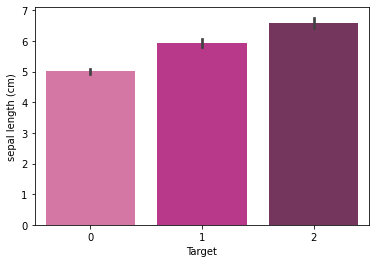

In [ ]:
sns.barplot(x = 'Target', y = 'sepal length (cm)', data = df,palette='RdPu_d')

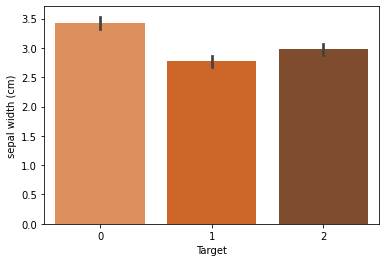

In [ ]:
sns.barplot(x = 'Target', y = 'sepal width (cm)', data = df,palette='Oranges_d')

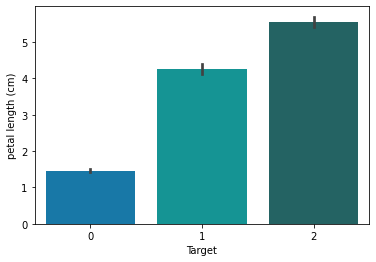

In [ ]:
sns.barplot(x = 'Target', y = 'petal length (cm)', data = df,palette='winter_d')

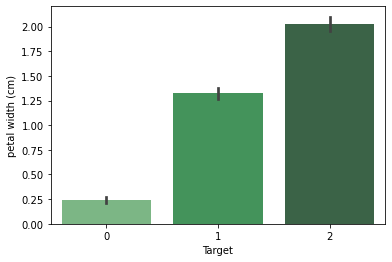

In [ ]:
sns.barplot(x = 'Target', y = 'petal width (cm)', data = df,palette='Greens_d')



---



# **Data Correlation**

To obtain the detailed information about data correlation, correlation matrix is used. The correlation matrix gives information about how the two variables interact.

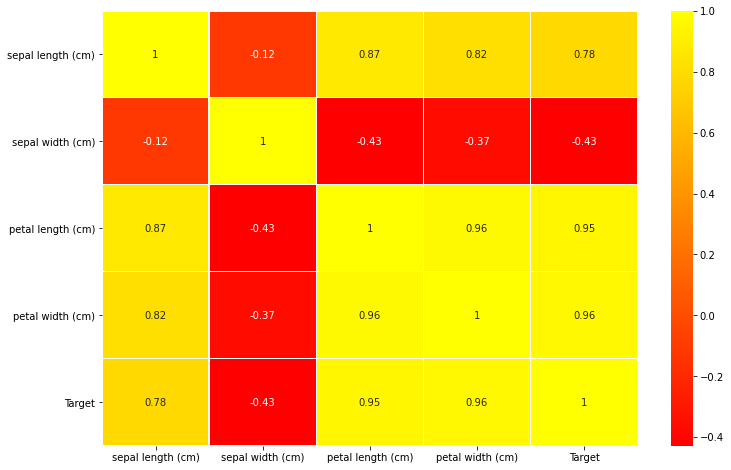

In [ ]:
correlation=df.corr()
colormap=plt.cm.autumn
plt.figure(figsize=(12,8))
sns.heatmap(correlation,cmap=colormap, annot=True, linewidths=0.2) 



---



# **Train Test Split**

The dataset is then divided into target (y) and input (X) features.

In [ ]:
# seperating the data into features and target variable

X = df.drop("Target",axis=1)
y = df['Target']

After this the data is split into training and testing data in the proportion 80:20 using sklearn train_test_split.


---



In [ ]:
# splitting the data into train and test sets in the proportion 80:20 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# **Feature Scaling / Standardization**

Feature Scaling or Standardization is used to normalise the data within a particular range. Standardization is about making sure that data is internally consistent; that is, each data type has the same content and format. It is a process of subtracting the means from each feature and dividing by the feature standard deviations.

The ultimate goal to perform standardization  in this dataset is to bring down all the features to a common scale without distorting the differences in the range of the values.


---



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)    # learning
print(X_train)

X_test=sc.transform(X_test)
print("##############################")
print(X_test)

[[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]
 [-0.80392556 -0.82150798  0.04735245  0.21801546]
 [-0.21352735  1.73601687 -1.19037495 -1.20664002]
 [ 0.14071157 -0.82150798  0.72247648  0.47704373]
 [ 0.02263193 -0.12400121  0.21613346  0.34752959]
 [-0.09544771 -1.05401024  0.10361279 -0.04101281]
 [ 1.0853487  -0.12400121  0.94751783  1.1246144 ]
 [-1.39432376  0.34100331 -1.41541629 -1.33615415]
 [ 1.20342834  0.10850105  0.72247648  1.38364267]
 [-1.04008484  1.03851009 -1.24663528 -0.81809761]
 [-0.56776627  1.50351461 -1.30289562 -1.33615415]
 [-1.04008484 -2.4490238  -0.1776889  -0.30004108]
 [ 0.73110978 -0.12400121  0.94751783  0.736072  ]
 [ 0.96726906  0.57350557  1.0600385   1.64267094]
 [ 0.14071157 -1.98401928  0.66621615  0.34752959]
 [ 0.96726906 -1.2865125   1.11

# **Decision Tree**

Decision Tree is a Supervised Machine learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier()
model=clf.fit(X_train,y_train)
text_visual=tree.export_text(clf)
print(text_visual)

|--- feature_2 <= -0.82
|   |--- class: 0
|--- feature_2 >  -0.82
|   |--- feature_3 <= 0.67
|   |   |--- feature_2 <= 0.64
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.64
|   |   |   |--- feature_3 <= 0.41
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.41
|   |   |   |   |--- feature_2 <= 0.92
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.92
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  0.67
|   |   |--- feature_2 <= 0.58
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.58
|   |   |   |--- class: 2



### **Visualizing Decision tree**

[Text(558.0, 847.1100000000001, 'X[2] <= -0.825\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(472.15384615384613, 693.0900000000001, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(643.8461538461538, 693.0900000000001, 'X[3] <= 0.671\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(343.38461538461536, 539.0700000000002, 'X[2] <= 0.638\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(171.69230769230768, 385.05000000000007, 'X[3] <= 0.542\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(85.84615384615384, 231.0300000000001, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(257.53846153846155, 231.0300000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 385.05000000000007, 'X[3] <= 0.412\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(429.23076923076917, 231.0300000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(600.9230769230769, 231.0300000000001, 'X[2] <= 0.919\ngini = 0.444\nsamples = 3\

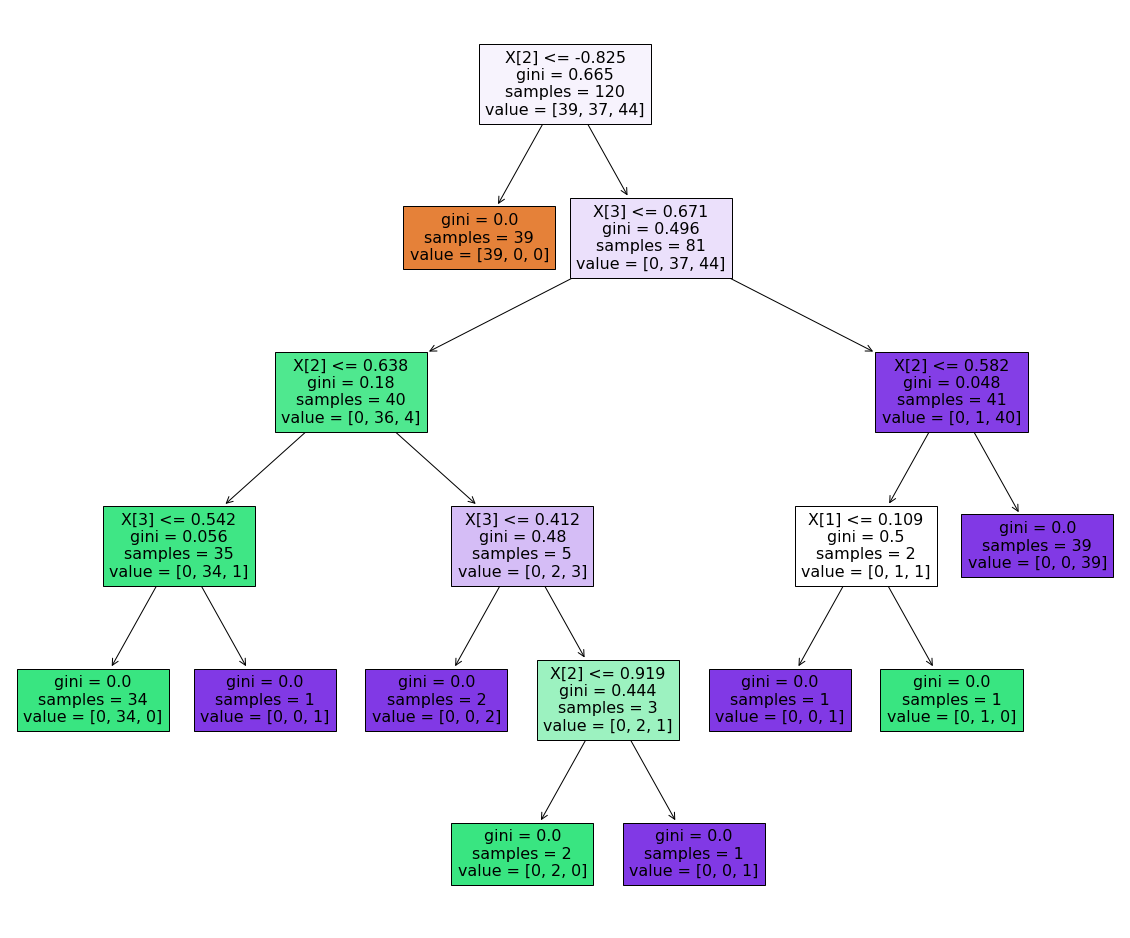

In [ ]:
plt.figure(figsize=(20,17))
tree.plot_tree(model,filled=True)

In [ ]:
y_pred = clf.predict(X_test)   # prediction

### *Confusion Matrix*


---



A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. 



Text(91.68, 0.5, 'Predicted class')

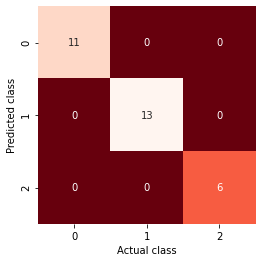

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.metrics import confusion_matrix
conmat=confusion_matrix(y_test,y_pred) # Compute confusion matrix to evaluate the accuracy of a classification.
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False,cmap='Reds_r') 
pt.xlabel('Actual class') 
pt.ylabel('Predicted class')

### *Classification Report*


---



The classification report is used to display the precision, recall, F1, and support scores for the model.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

F1 score - weighted harmonic mean of precision and recall 

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Support is the number of actual occurrences of the class in the specified dataset. 

In [ ]:
import sklearn.metrics as met
from sklearn.metrics import accuracy_score,classification_report
cr = classification_report(y_test,y_pred)    # Build a text report showing the main classification metrics.
print(cr)
accuracyscore=met.accuracy_score(y_test, y_pred)*100   # for getting the accuracy score in percentage multiply by 100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Accuracy score given for test data: 100.0


### **Accuracy score given for test data: 100.0**



---



In [ ]:
#  creating input variables

sepal_length = 4.0
sepal_width = 3.5
petal_length = 5.5
petal_width = 1.2

In [ ]:
data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# scaling the input data
scaled_data = sc.transform(data)

class_index = clf.predict(scaled_data)[0]
print("class index of input variables: ",class_index)
if class_index == 0:
    print("input variables belongs to class Setosa")
elif class_index == 1:
    print("input variables belongs to class Virginica")
elif class_index == 2:
    print("input variables belongs to class Versicolor")

class index of input variables:  2
input variables belongs to class Versicolor




---



---

